In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("shopping_trends.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [7]:
df['Customer ID'].unique()

array([   1,    2,    3, ..., 3898, 3899, 3900], dtype=int64)

In [8]:
df['Customer ID'].duplicated().sum()

0

In [9]:
df['Age'].unique()

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60], dtype=int64)

In [10]:
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [11]:
df['Age_Group'].value_counts()

Age_Group
51–60    753
41–50    750
21–30    737
31–40    725
61–70    723
0–20     212
Name: count, dtype: int64

In [12]:
df.groupby('Age_Group')['Purchase Amount (USD)'].mean()

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\1110754199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Purchase Amount (USD)'].mean()


Age_Group
0–20     58.981132
21–30    60.753053
31–40    59.576552
41–50    58.838667
51–60    60.180611
61–70    59.701245
Name: Purchase Amount (USD), dtype: float64

In [13]:
df.groupby('Age_Group')['Purchase Amount (USD)'].sum().sort_index()

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\263277108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Purchase Amount (USD)'].sum().sort_index()


Age_Group
0–20     12504
21–30    44775
31–40    43193
41–50    44129
51–60    45316
61–70    43164
Name: Purchase Amount (USD), dtype: int64

In [14]:
df.groupby('Age_Group')['Category'].value_counts().unstack().fillna(0)

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\1705132096.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Category'].value_counts().unstack().fillna(0)


Category,Accessories,Clothing,Footwear,Outerwear
Age_Group,,,,
0–20,59,104,28,21
21–30,240,332,109,56
31–40,243,319,105,58
41–50,229,331,125,65
51–60,226,331,134,62
61–70,243,320,98,62


In [15]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [16]:
result = pd.crosstab(df['Age_Group'], df['Gender'], margins = True) 
result = result.sort_values(by = 'Male',ascending=False)
result

Gender,Female,Male,All
Age_Group,,,
All,1248,2652,3900
51–60,230,523,753
21–30,236,501,737
61–70,228,495,723
41–50,258,492,750
31–40,237,488,725
0–20,59,153,212


In [17]:
result = pd.crosstab(df['Age_Group'], df['Category'], margins = True) 
result = result.sort_values(by = 'All',ascending=False) 
result

Category,Accessories,Clothing,Footwear,Outerwear,All
Age_Group,,,,,
All,1240,1737,599,324,3900
51–60,226,331,134,62,753
41–50,229,331,125,65,750
21–30,240,332,109,56,737
31–40,243,319,105,58,725
61–70,243,320,98,62,723
0–20,59,104,28,21,212


In [18]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70','71-80','81-90','91-100']
df['Purchase Amount (USD)_Group'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels, right=True)

In [19]:
result = pd.pivot_table(df, values='Purchase Amount (USD)', index='Season', columns='Purchase Amount (USD)_Group', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result


C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\3049780345.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  result = pd.pivot_table(df, values='Purchase Amount (USD)', index='Season', columns='Purchase Amount (USD)_Group', aggfunc='sum', margins=True, margins_name='All')


Purchase Amount (USD)_Group,0–20,21–30,31–40,41–50,51–60,61–70,71-80,81-90,91-100,All
Season,,,,,,,,,,
All,1040,12743,17989,20601,26161,30602,35383,41207,47355,233081
Fall,80,2907,4351,5397,6641,6899,8586,11205,13952,60018
Spring,400,3741,4611,4094,7232,7942,9389,9729,11541,58679
Winter,240,2778,4458,5495,6034,7878,9792,10098,11834,58607
Summer,320,3317,4569,5615,6254,7883,7616,10175,10028,55777


In [20]:
result = pd.pivot_table(df, values='Purchase Amount (USD)', index='Category', columns='Purchase Amount (USD)_Group', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result


C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\1690662026.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  result = pd.pivot_table(df, values='Purchase Amount (USD)', index='Category', columns='Purchase Amount (USD)_Group', aggfunc='sum', margins=True, margins_name='All')


Purchase Amount (USD)_Group,0–20,21–30,31–40,41–50,51–60,61–70,71-80,81-90,91-100,All
Category,,,,,,,,,,
All,1040,12743,17989,20601,26161,30602,35383,41207,47355,233081
Clothing,520,5654,7876,8715,11467,13895,15931,18635,21571,104264
Accessories,280,3785,5781,6849,8360,9925,11823,12635,14762,74200
Footwear,140,1857,2720,3195,4291,4739,5258,6516,7377,36093
Outerwear,100,1447,1612,1842,2043,2043,2371,3421,3645,18524


#### The pivot table summarizes the total purchase amount per category across different purchase amount groups, with a final "All" column showing overall totals. Sorting by total revenue highlights which product categories generate the most income.

In [21]:
df.groupby(['Category', 'Season'])['Purchase Amount (USD)'].mean().unstack()
# This shows average spending (per transaction) for better fairness across categories.

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,61.339506,56.501661,60.987179,60.366337
Clothing,61.405152,60.995595,56.563725,60.879464
Footwear,63.713235,58.619632,58.706250,60.571429
Outerwear,59.761364,54.629630,57.040000,57.025000


In [22]:
df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].mean().unstack()
# This shows average spending (per transaction) for better fairness across Item Purchased.

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,59.058824,56.564103,61.777778,65.680000
Belt,62.268293,57.512195,57.256410,62.275000
Blouse,64.047619,60.239130,60.837209,58.325000
Boots,61.685714,60.700000,62.500000,66.322581
Coat,63.323529,52.956522,60.023810,55.512821
Dress,67.944444,60.325581,58.404255,63.375000
Gloves,61.243243,58.880952,59.758621,62.656250
Handbag,57.958333,55.777778,56.857143,61.088235
Hat,64.480000,60.185185,60.351351,57.325000


In [23]:
result = pd.pivot_table(df, values='Previous Purchases', index='Location', columns='Size', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result
# Are certain sizes are more popular in specific locations by Previous Purchases.

Size,L,M,S,XL,All
Location,,,,,
All,27071,44410,16429,10961,98871
Illinois,676,944,575,252,2447
Alabama,651,1078,486,228,2443
Montana,656,991,504,275,2426
California,631,1180,186,330,2327
Minnesota,668,1111,368,160,2307
Maryland,486,1104,381,311,2282
Missouri,787,990,343,160,2280
Nevada,649,947,497,172,2265


In [24]:
result = pd.pivot_table(df, values='Previous Purchases', index='Season', columns='Size', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result
# Are certain sizes are more popular in specific Season by Previous Purchases.

Size,L,M,S,XL,All
Season,,,,,
All,27071,44410,16429,10961,98871
Winter,7382,10873,3638,3276,25169
Spring,6260,11420,4779,2632,25091
Fall,6572,11128,3979,2667,24346
Summer,6857,10989,4033,2386,24265


In [25]:
result = pd.pivot_table(df, values='Previous Purchases', index='Season', columns='Color', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow,All
Season,,,,,,,,,,,,,,,,,,,,,
All,3660,4312,3602,3720,3727,4519,3348,4499,4161,3594,...,3724,3757,3856,4550,4438,3759,4016,3985,4004,98871
Winter,1029,1106,779,989,1025,1121,944,669,1303,1217,...,1103,910,940,989,763,1110,935,911,1114,25169
Spring,913,1015,1052,931,1095,1098,925,1411,880,839,...,1106,1106,911,1051,1258,924,1062,955,801,25091
Fall,838,1123,594,804,738,1057,787,1259,982,788,...,892,938,1067,1085,1158,688,1046,789,1165,24346
Summer,880,1068,1177,996,869,1243,692,1160,996,750,...,623,803,938,1425,1259,1037,973,1330,924,24265


In [26]:
result = pd.pivot_table(df, values='Purchase Amount (USD)', index='Season', columns='Color', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow,All
Season,,,,,,,,,,,,,,,,,,,,,
All,8881,9753,8657,8328,9277,10274,8419,9936,11104,8269,...,9270,9062,8779,9832,10459,8064,10245,8895,10308,233081
Fall,1943,2450,1817,2233,1822,2648,2284,2937,2451,2160,...,2099,2341,2437,2300,2522,1653,2777,1783,3113,60018
Spring,2452,2615,2152,1671,2710,2667,2285,2862,2513,1929,...,2525,2484,1777,1973,2617,2251,2738,2404,2390,58679
Winter,2307,2195,2089,2422,2593,2432,2168,1667,3186,2512,...,2687,2072,2351,2247,2427,2147,2381,2347,2543,58607
Summer,2179,2493,2599,2002,2152,2527,1682,2470,2954,1668,...,1959,2165,2214,3312,2893,2013,2349,2361,2262,55777


In [28]:
df.groupby(['Category', 'Season'])['Previous Purchases'].sum().unstack()
# # Summarizes total previous purchases for each category-season pair in a pivot-style table

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,7987,7809,8363,7741
Clothing,10869,11241,9980,11681
Footwear,3344,3939,4098,3733
Outerwear,2146,2102,1824,2014


In [29]:
df.groupby(['Item Purchased', 'Season'])['Previous Purchases'].sum().unstack()
# # Summarizes total previous purchases for each Item Purchased-season pair in a pivot-style table

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,728,935,1109,598
Belt,1015,1061,829,972
Blouse,1160,1188,1126,1089
Boots,899,979,1021,897
Coat,959,1217,1132,1009
Dress,879,1293,1130,1105
Gloves,960,1071,865,806
Handbag,1110,880,834,957
Hat,1144,849,981,927


In [30]:
df.groupby(['Category', 'Season'])['Purchase Amount (USD)'].sum().unstack()
# # Summarizes total Purchase Amount (USD) for each category-season pair in a pivot-style table

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,19874,17007,19028,18291
Clothing,26220,27692,23078,27274
Footwear,8665,9555,9393,8480
Outerwear,5259,4425,4278,4562


In [31]:
df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].sum().unstack()
# # Summarizes total Purchase Amount (USD) for each Item Purchased-season pair in a pivot-style table

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,2008,2206,2780,1642
Belt,2553,2358,2233,2491
Blouse,2690,2771,2616,2333
Boots,2159,2428,2375,2056
Coat,2153,2436,2521,2165
Dress,2446,2594,2745,2535
Gloves,2266,2473,1733,2005
Handbag,2782,2008,1990,2077
Hat,3224,1625,2233,2293


In [32]:
df.groupby(['Location', 'Category'])['Previous Purchases'].sum().unstack()
# Summarizes total previous purchases for each category-location pair in a pivot-style table

Category,Accessories,Clothing,Footwear,Outerwear
Location,,,,
Alabama,687,1066,392,298
Alaska,767,1007,202,47
Arizona,629,831,188,196
Arkansas,688,1054,271,125
California,789,1176,260,102
Colorado,598,716,341,143
Connecticut,525,773,268,306
Delaware,685,976,345,112
Florida,443,856,220,258


In [33]:
df.groupby(['Location', 'Category'])['Purchase Amount (USD)'].sum().unstack()
# # Summarizes total Purchase Amount (USD) for each category-Location pair in a pivot-style table

Category,Accessories,Clothing,Footwear,Outerwear
Location,,,,
Alabama,1576,2334,914,437
Alaska,1719,2229,693,226
Arizona,1270,2129,471,456
Arkansas,1555,2413,589,271
California,1845,2740,662,358
Colorado,1454,1748,654,366
Connecticut,1334,1905,589,398
Delaware,1486,2336,769,167
Florida,1232,1680,434,452


In [34]:
df[['Previous Purchases', 'Purchase Amount (USD)']].corr()

,Previous Purchases,Purchase Amount (USD)
Previous Purchases,1.000000,0.008063
Purchase Amount (USD),0.008063,1.000000


In [35]:
df.groupby('Season')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Season
Fall      61.556923
Winter    60.357364
Spring    58.737738
Summer    58.405236
Name: Purchase Amount (USD), dtype: float64

In [36]:
df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].mean().unstack()
# # Calculates the average purchase amount for each item across different seasons in a pivot-style table.

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,59.058824,56.564103,61.777778,65.680000
Belt,62.268293,57.512195,57.256410,62.275000
Blouse,64.047619,60.239130,60.837209,58.325000
Boots,61.685714,60.700000,62.500000,66.322581
Coat,63.323529,52.956522,60.023810,55.512821
Dress,67.944444,60.325581,58.404255,63.375000
Gloves,61.243243,58.880952,59.758621,62.656250
Handbag,57.958333,55.777778,56.857143,61.088235
Hat,64.480000,60.185185,60.351351,57.325000


### calculates the average purchase amount for each item across different seasons. This helps identify seasonal trends in spending for specific products. For example, if certain items have higher average purchase values in particular seasons, businesses can strategically time promotions or stock inventory to align with these trends.

In [37]:
df.groupby(['Category', 'Season'])['Purchase Amount (USD)'].mean().unstack()
# # Calculates the average purchase amount for each Category different seasons in a pivot-style table.

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,61.339506,56.501661,60.987179,60.366337
Clothing,61.405152,60.995595,56.563725,60.879464
Footwear,63.713235,58.619632,58.706250,60.571429
Outerwear,59.761364,54.629630,57.040000,57.025000


In [38]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_Group', 'Purchase Amount (USD)_Group'],
      dtype='object')

In [39]:
frequent_buyers = df[df['Previous Purchases']>10]
Category_frequent_buyers = frequent_buyers['Category'].value_counts()
Category_frequent_buyers
# # Counts how many times each category was purchased by frequent buyers (more than 10 previous purchases)

Category
Clothing       1389
Accessories     998
Footwear        480
Outerwear       249
Name: count, dtype: int64

In [40]:
frequent_buyers = df[(df['Previous Purchases'] > 10) & (df['Subscription Status'] == 'Yes')]
Category_frequent_buyers = frequent_buyers['Category'].value_counts()
Category_frequent_buyers
# Filters frequent buyers with subscription and counts purchases per category

Category
Clothing       379
Accessories    270
Footwear       144
Outerwear       76
Name: count, dtype: int64

In [41]:
result = pd.crosstab(df['Purchase Amount (USD)_Group'], df['Promo Code Used'], normalize='index') * 100
result = result.sort_values(by = 'Yes',ascending=False)
result
# # Shows the percentage of promo code usage across different purchase amount groups, sorted by highest promo usage

Promo Code Used,No,Yes
Purchase Amount (USD)_Group,,
21–30,54.308617,45.691383
61–70,54.603854,45.396146
71-80,56.289979,43.710021
41–50,56.828194,43.171806
81-90,56.846473,43.153527
31–40,57.563851,42.436149
51–60,58.262712,41.737288
0–20,59.615385,40.384615
91-100,60.887097,39.112903


In [42]:
result = pd.crosstab(df['Purchase Amount (USD)_Group'], df['Discount Applied'], normalize='index') * 100
result = result.sort_values(by = 'Yes',ascending=False)
result
# Shows the percentage of Discount Applied across different purchase amount groups, sorted by highest promo usage

Discount Applied,No,Yes
Purchase Amount (USD)_Group,,
21–30,54.308617,45.691383
61–70,54.603854,45.396146
71-80,56.289979,43.710021
41–50,56.828194,43.171806
81-90,56.846473,43.153527
31–40,57.563851,42.436149
51–60,58.262712,41.737288
0–20,59.615385,40.384615
91-100,60.887097,39.112903


In [43]:
result = pd.pivot_table(df, values='Previous Purchases', index='Item Purchased', columns='Promo Code Used', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result
# Creates a pivot table showing the total number of previous purchases for each item, split by promo code usage, and sorts items by overall purchase volume.

Promo Code Used,No,Yes,All
Item Purchased,,,
All,55700,43171,98871
Jewelry,2845,2098,4943
Blouse,3077,1486,4563
Dress,2162,2245,4407
Shirt,2460,1878,4338
Coat,2003,2314,4317
Pants,2424,1878,4302
Scarf,2373,1832,4205
Sweater,2097,2102,4199


In [44]:
result = pd.pivot_table(df, values='Purchase Amount (USD)', index='Item Purchased', columns='Promo Code Used', aggfunc='sum', margins=True, margins_name='All')

result = result.sort_values(by='All', ascending=False)
result
# Creates a pivot table showing the total number of Purchase Amount (USD) for each item, split by promo code usage, and sorts items by overall purchase volume.

Promo Code Used,No,Yes,All
Item Purchased,,,
All,133670,99411,233081
Blouse,6916,3494,10410
Shirt,5979,4353,10332
Dress,5952,4368,10320
Pants,5253,4837,10090
Jewelry,5865,4145,10010
Sunglasses,5728,3921,9649
Belt,5402,4233,9635
Scarf,5497,4064,9561


In [45]:
df.groupby('Promo Code Used')['Previous Purchases'].size()

Promo Code Used
No     2223
Yes    1677
Name: Previous Purchases, dtype: int64

In [46]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [47]:
df['Payment Method'].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [48]:
df['Payment Method'].value_counts().idxmax()

'Credit Card'

In [49]:
Payment_Method = df[(df['Payment Method'] == df['Preferred Payment Method'] )]
Payment_Method_match = Payment_Method['Payment Method'].value_counts()
Payment_Method_match

Payment Method
Cash             120
PayPal           110
Bank Transfer    103
Venmo            101
Credit Card       96
Debit Card        87
Name: count, dtype: int64

In [50]:
pd.crosstab(df['Preferred Payment Method'], df['Age_Group'], margins = True) 
# Creates a frequency table of preferred payment methods by age group, including totals.

Age_Group,0–20,21–30,31–40,41–50,51–60,61–70,All
Preferred Payment Method,,,,,,,
Bank Transfer,40,117,108,120,112,115,612
Cash,36,136,111,132,123,132,670
Credit Card,41,120,117,117,137,139,671
Debit Card,27,129,117,127,123,113,636
PayPal,34,120,135,135,145,108,677
Venmo,34,115,137,119,113,116,634
All,212,737,725,750,753,723,3900


In [51]:
pd.crosstab(df['Shipping Type'], df['Preferred Payment Method'], margins = True) 
# Creates a frequency table of preferred payment methods by Shipping Type, including totals.

Preferred Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo,All
Shipping Type,,,,,,,
2-Day Shipping,98,100,123,93,109,104,627
Express,91,108,114,98,129,106,646
Free Shipping,101,121,107,117,123,106,675
Next Day Air,117,104,108,105,106,108,648
Standard,93,118,115,118,107,103,654
Store Pickup,112,119,104,105,103,107,650
All,612,670,671,636,677,634,3900


In [52]:
pd.crosstab(df['Shipping Type'], df['Category'], normalize='index') * 100
# Finds if certain product categories are linked to specific shipping preferences.

Category,Accessories,Clothing,Footwear,Outerwear
Shipping Type,,,,
2-Day Shipping,32.854864,44.816587,14.354067,7.974482
Express,31.424149,44.891641,14.860681,8.823529
Free Shipping,28.888889,43.555556,18.074074,9.481481
Next Day Air,32.561728,45.216049,14.351852,7.870370
Standard,31.804281,45.412844,15.290520,7.492355
Store Pickup,33.384615,43.384615,15.076923,8.153846


In [53]:
df['Review Rating'].unique()

array([3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, 4.5, 4.7, 2.8, 4.6,
       3.3, 4.4, 3.6, 5. , 4. , 3.7, 4.2, 3.9, 3. , 3.8, 3.4, 4.3, 2.5])

In [54]:
high_rating = df[df['Review Rating'] > 4.0]
Category_with_frequent_high_rating = high_rating['Category'].value_counts()
Category_with_frequent_high_rating


Category
Clothing       622
Accessories    478
Footwear       237
Outerwear      126
Name: count, dtype: int64

In [55]:
low_rating = df[(df['Review Rating'] < 3.0)]
Category_with_frequent_low_rating = low_rating['Category'].value_counts()
Category_with_frequent_low_rating

Category
Clothing       322
Accessories    203
Footwear        98
Outerwear       62
Name: count, dtype: int64

In [56]:
high_rating = df[(df['Review Rating'] > 4.0)]
Item_Purchased_with_frequent_high_rating = high_rating['Item Purchased'].value_counts()
Item_Purchased_with_frequent_high_rating

Item Purchased
Sandals       71
Jewelry       69
Jacket        65
Gloves        64
Belt          63
Dress         62
Socks         62
Skirt         62
Sweater       61
Coat          61
Handbag       61
Boots         60
T-shirt       60
Pants         59
Sunglasses    58
Hoodie        57
Shirt         56
Hat           56
Scarf         55
Shoes         54
Shorts        54
Backpack      52
Sneakers      52
Blouse        50
Jeans         39
Name: count, dtype: int64

In [57]:
low_rating = df[(df['Review Rating'] < 3.0)]
Item_Purchased_with_frequent_low_rating = low_rating['Item Purchased'].value_counts()
Item_Purchased_with_frequent_low_rating

Item Purchased
Shirt         39
Coat          35
Pants         34
Scarf         33
Shorts        33
Sweater       31
Sandals       31
Jewelry       28
Handbag       28
Blouse        28
Socks         28
Jeans         28
Hoodie        28
Sunglasses    27
Jacket        27
Belt          26
Skirt         26
Dress         24
Gloves        24
Sneakers      23
T-shirt       23
Shoes         22
Boots         22
Backpack      21
Hat           16
Name: count, dtype: int64

In [58]:
result = pd.crosstab(df['Review Rating'], df['Discount Applied'], margins=True)
sorted_result = result.drop('All').sort_index(ascending=False)
sorted_result.loc['All'] = result.loc['All']
sorted_result

Discount Applied,No,Yes,All
Review Rating,,,
5.0,44,24,68
4.9,95,71,166
4.8,80,64,144
4.7,86,62,148
4.6,102,72,174
4.5,74,65,139
4.4,87,71,158
4.3,91,56,147
4.2,103,68,171


C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\3301794431.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped = df[selected_columns].replace(mapping)


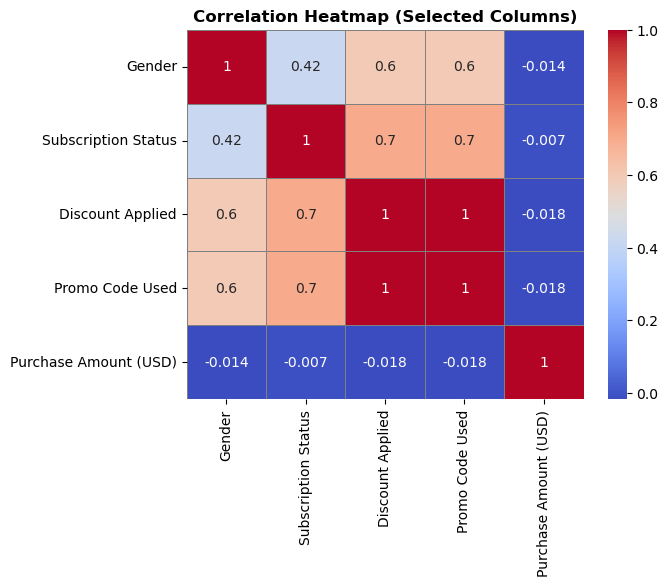

In [59]:
mapping = {'No': 0, 'Yes': 1, 'Male': 1,'Female':0}
selected_columns = ['Gender', 'Subscription Status','Discount Applied','Promo Code Used','Purchase Amount (USD)']
df_mapped = df[selected_columns].replace(mapping)

corr = df_mapped.corr()

sns.heatmap(corr, annot = True,linewidths=0.5,linecolor='gray', cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Columns)", fontweight='bold')
plt.show()

#### The correlation heatmap provides a visual representation of the relationships among selected customer attributes, including gender, subscription status, discount usage, promo code usage, and purchase amount. By mapping categorical values to numeric (e.g., 'Yes' = 1, 'No' = 0), the heatmap reveals how strongly these variables are linearly related. Notably, stronger positive or negative correlations indicate potential behavioral patterns, such as whether subscribers are more likely to use discounts or if promo code usage is associated with higher purchase amounts. The color gradient from "cool" to "warm" highlights the intensity and direction of these correlations, aiding in identifying key drivers of customer spending.

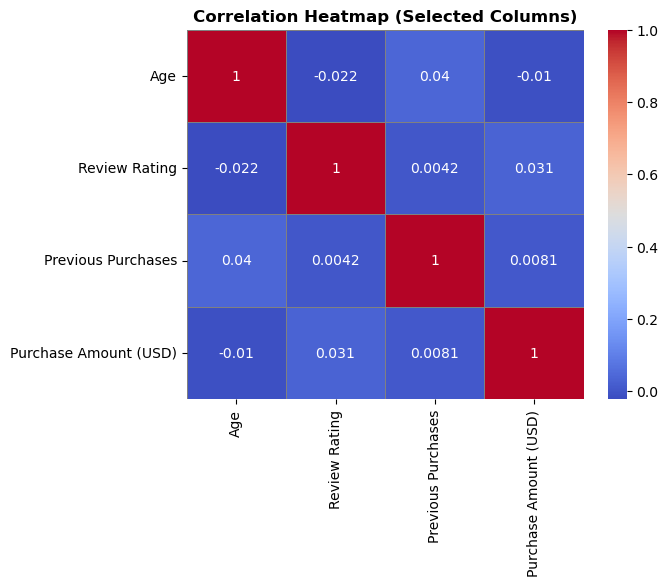

In [61]:
selected_columns = ['Age', 'Review Rating','Previous Purchases','Purchase Amount (USD)']

corr = df[selected_columns].corr()

sns.heatmap(corr, annot = True,linewidths=0.5,linecolor='gray', cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Columns)", fontweight='bold')
plt.show()

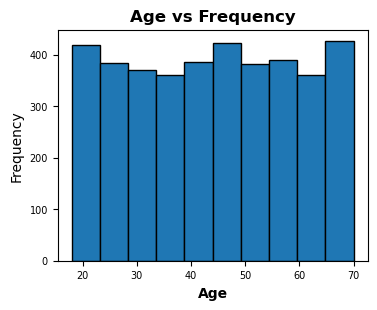

In [62]:
plt.figure(figsize=(4, 3))
df['Age'].plot(kind = "hist",fontsize=7, edgecolor = "black")
plt.xlabel("Age", fontweight='bold')
plt.title("Age vs Frequency", fontweight='bold')
plt.show()

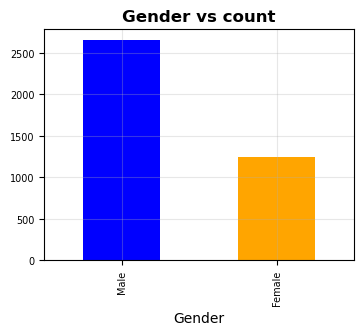

In [63]:
plt.figure(figsize=(4, 3))
df["Gender"].value_counts().plot(kind = 'bar',fontsize=7, color = ['blue', 'orange'])
plt.title("Gender vs count", fontweight='bold')
plt.grid(alpha = 0.3)
plt.show()

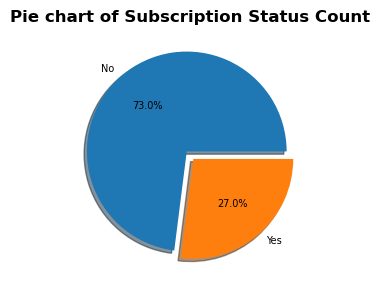

In [64]:
plt.figure(figsize=(4, 3))
df['Subscription Status'].value_counts().plot(kind = 'pie', shadow=True, explode=[0.05, 0.05], autopct = '%1.1f%%', fontsize=7)
plt.title("Pie chart of Subscription Status Count", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

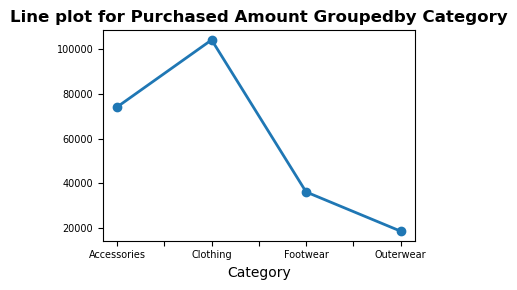

In [65]:
plt.figure(figsize=(4, 3))
df.groupby("Category")["Purchase Amount (USD)"].sum().plot(kind = "line",marker='o',linewidth=2, fontsize=7)
plt.title("Line plot for Purchased Amount Groupedby Category", fontweight='bold')
plt.tight_layout()
plt.show()

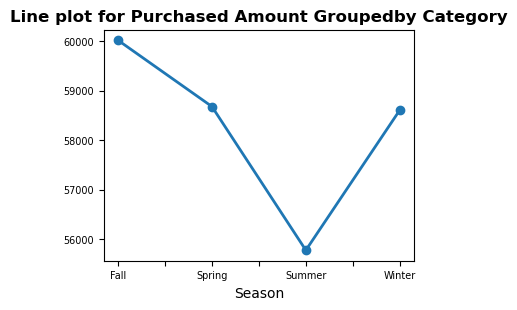

In [66]:
plt.figure(figsize=(4, 3))
df.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind = "line",marker='o',linewidth=2, fontsize=7)
plt.title("Line plot for Purchased Amount Groupedby Category",fontweight='bold')
plt.show()

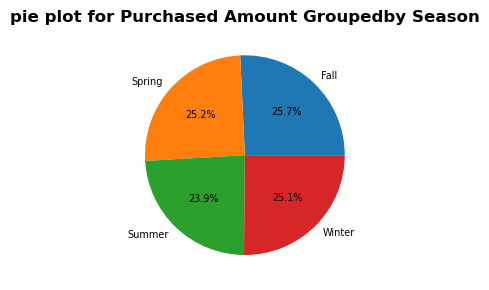

In [67]:
plt.figure(figsize=(5, 3))
df.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind = "pie",startangle=0, autopct = '%1.1f%%',labeldistance=1.1, fontsize=7)
plt.title("pie plot for Purchased Amount Groupedby Season", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

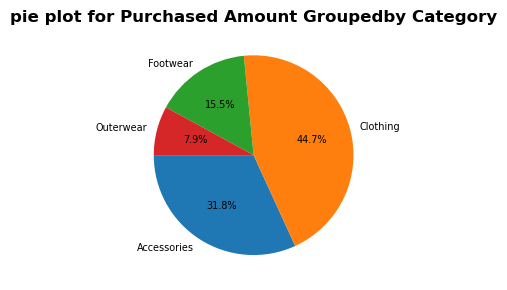

In [68]:
plt.figure(figsize=(5, 3))
df.groupby("Category")["Purchase Amount (USD)"].sum().plot(kind = "pie",startangle=180, autopct = '%1.1f%%', fontsize=7, labeldistance=1.1)
plt.title("pie plot for Purchased Amount Groupedby Category", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

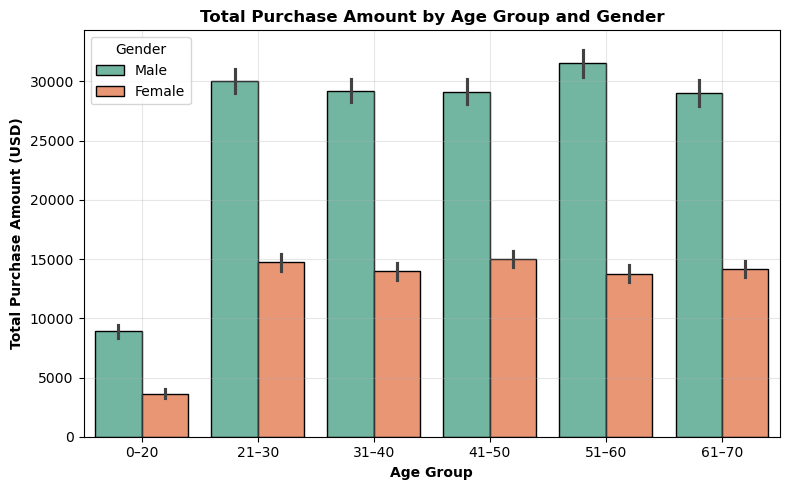

In [69]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = 'Age_Group' ,y = 'Purchase Amount (USD)', hue = 'Gender',palette='Set2',edgecolor = "black", estimator='sum')
plt.title("Total Purchase Amount by Age Group and Gender", fontweight='bold')
plt.ylabel("Total Purchase Amount (USD)", fontweight='bold')
plt.xlabel("Age Group", fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### The bar plot illustrates the total purchase amount segmented by age group and gender, providing insights into consumer spending behavior across different demographics. By using the sum estimator, the chart highlights which age groups contribute the most to overall sales and how spending varies between males and females within each group. The visualization reveals clear trends in purchasing power, helping businesses understand their key customer segments and tailor marketing or product strategies accordingly. The use of color and gridlines enhances readability and comparison across categories.

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\1942573507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = top_items.index ,y = top_items.values, palette='Set2',edgecolor = "black")


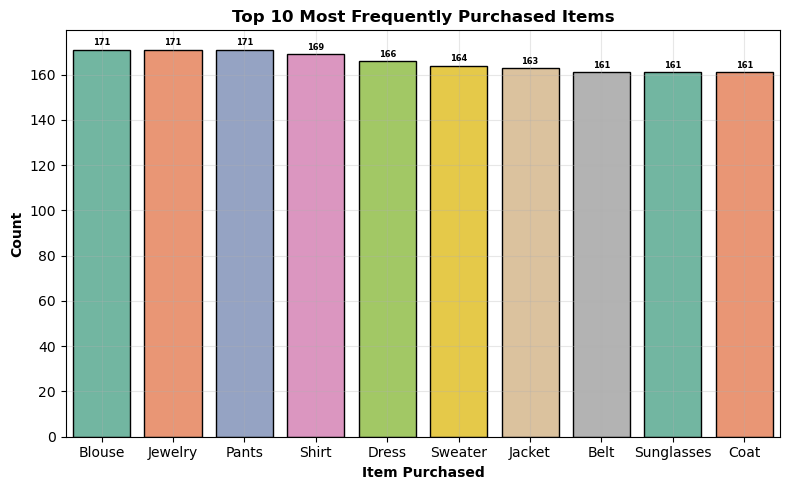

In [71]:
plt.figure(figsize=(8, 5))
top_items = df["Item Purchased"].value_counts().head(10)
ax = sns.barplot(x = top_items.index ,y = top_items.values, palette='Set2',edgecolor = "black")

for i, value in enumerate(top_items):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=6, fontweight='bold')
    
plt.title("Top 10 Most Frequently Purchased Items", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Item Purchased" ,fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

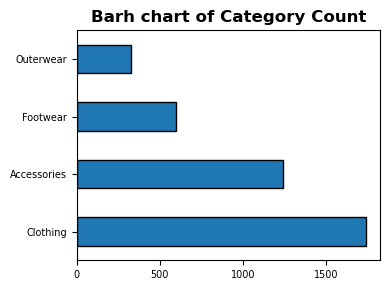

In [72]:
plt.figure(figsize=(4, 3))
df['Category'].value_counts().plot(kind = 'barh', fontsize=7, edgecolor = "black")
plt.title("Barh chart of Category Count", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

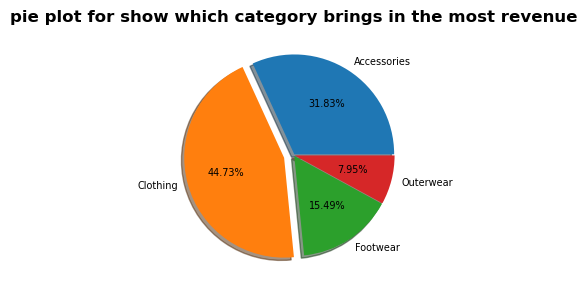

In [73]:
plt.figure(figsize=(4, 3))
df.groupby("Category")["Purchase Amount (USD)"].sum().plot(kind = 'pie',explode=[0.01, 0.1, 0.01, 0.01], shadow=True, autopct = '%1.2f%%', fontsize=7)
plt.title("pie plot for show which category brings in the most revenue",fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

#### The pie chart displays the proportion of total revenue contributed by each product category, offering a clear view of which categories are driving the most sales. By grouping the data by category and summing the purchase amounts, the chart highlights the dominant revenue sources within the business. The use of the explode parameter emphasizes specific segments, drawing attention to key categories. This visualization is useful for identifying top-performing categories and guiding resource allocation, inventory focus, and marketing efforts to maximize profitability.

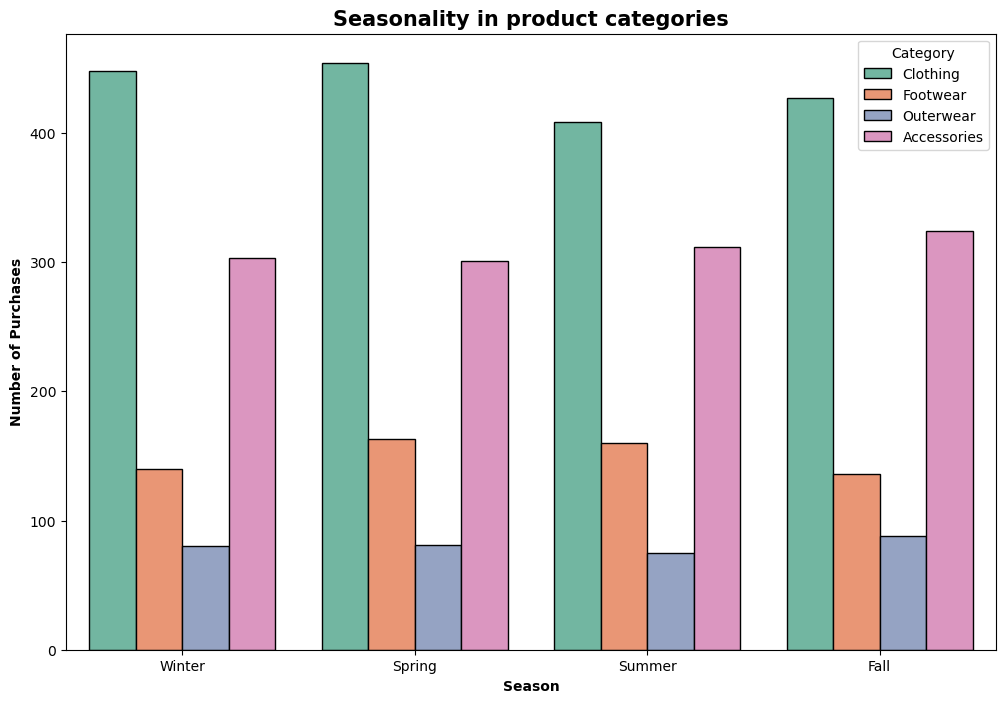

In [75]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Season', hue='Category',palette='Set2',edgecolor='black')
plt.title('Seasonality in product categories', weight='bold', fontsize=15)
plt.xlabel('Season', weight='bold',fontsize=10)
plt.ylabel('Number of Purchases', weight='bold', fontsize=10)
plt.show()

#### The bar chart illustrates the distribution of product categories across different seasons, highlighting seasonal trends in customer purchasing behavior. Each bar represents the number of purchases made in a particular season, segmented by product category using color coding. From the visualization, we can observe which categories are more popular in specific seasons, such as increased sales of certain items during winter or summer. This analysis provides valuable insights for inventory planning and targeted marketing strategies, enabling businesses to align their offerings with seasonal customer preferences.

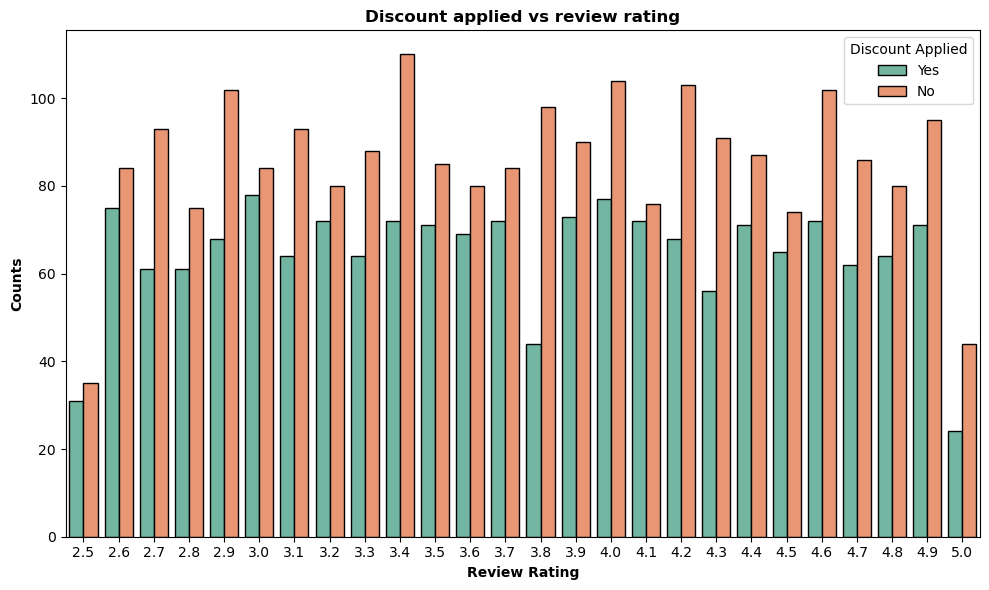

In [77]:
pd.crosstab(df['Review Rating'], df['Discount Applied'])
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Review Rating' , hue = 'Discount Applied',palette='Set2',edgecolor='black')
plt.xlabel('Review Rating',weight='bold',fontsize=10)
plt.ylabel("Counts",weight='bold',fontsize=10)
plt.legend(title="Discount Applied")
plt.title('Discount applied vs review rating', weight='bold')
plt.tight_layout()
plt.show()


#### Customers who did not receive discounts tend to leave more reviews across most rating levels compared to those who did receive discounts. This suggests that discounts do not strongly influence review frequency or positivity—customers are likely to leave reviews regardless of promotional offers.

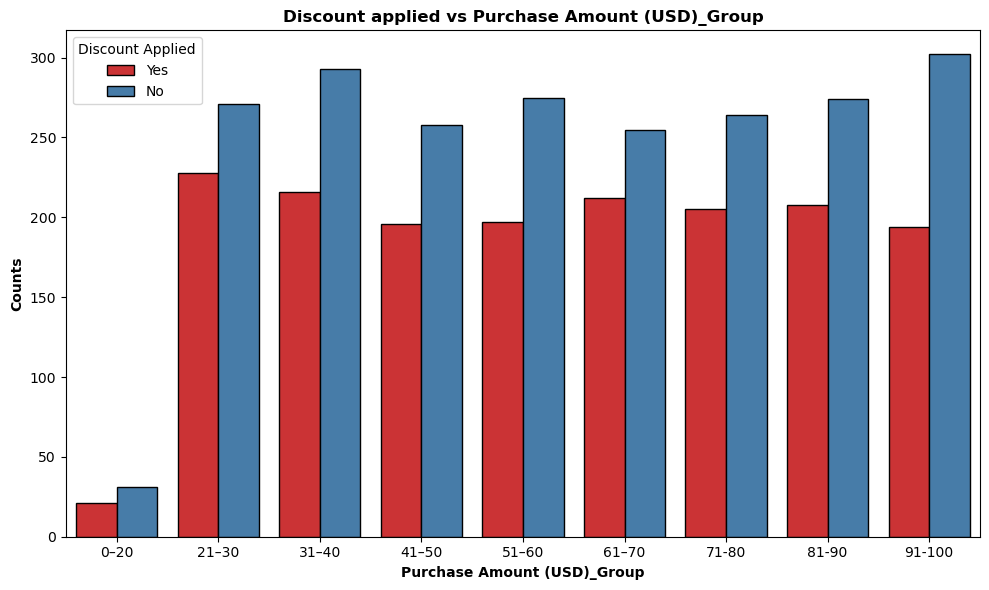

In [78]:
pd.crosstab(df['Purchase Amount (USD)_Group'], df['Discount Applied'])
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Purchase Amount (USD)_Group' , hue = 'Discount Applied',palette='Set1',edgecolor='black')
plt.xlabel('Purchase Amount (USD)_Group',weight='bold',fontsize=10)
plt.ylabel("Counts",weight='bold',fontsize=10)
plt.legend(title="Discount Applied")
plt.title('Discount applied vs Purchase Amount (USD)_Group', weight='bold')
plt.tight_layout()
plt.show()

#### Across all purchase amount groups, a higher number of transactions were made without discounts. Even in the highest spending group ($91–100), non-discounted purchases dominated. This suggests that customers are willing to spend more even without promotional offers, indicating strong product value perception or brand loyalty.

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\3007679147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Review Rating', palette='Set2', edgecolor='black')


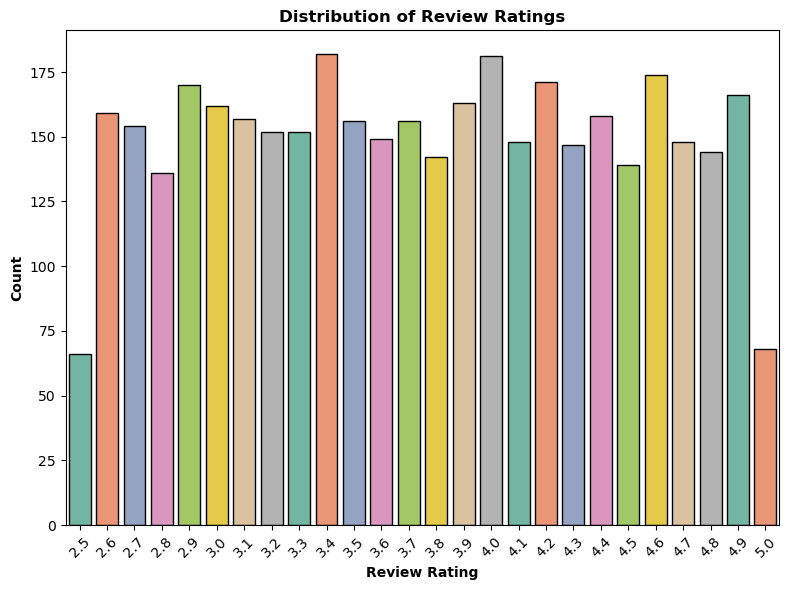

In [79]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Review Rating', palette='Set2', edgecolor='black')
plt.title('Distribution of Review Ratings', fontsize=12,weight='bold')
plt.xlabel('Review Rating', fontsize=10,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_30356\3409872222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = Subscription_Status, x = 'Payment Method' ,palette=custom_palette ,edgecolor='black')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


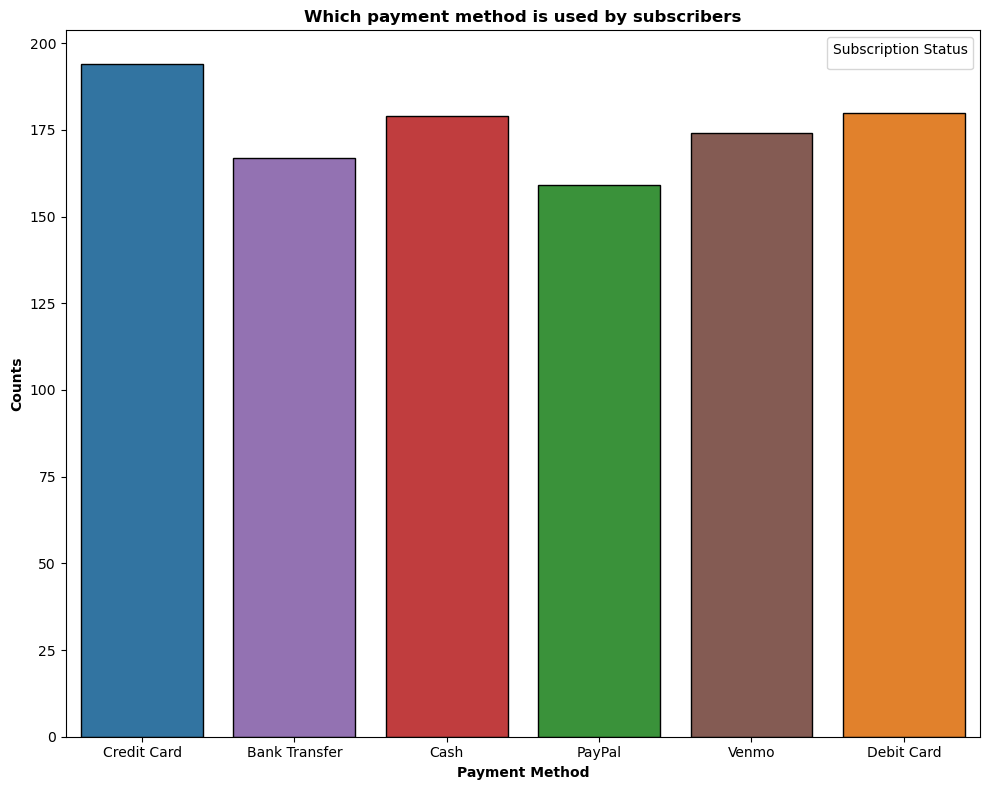

In [80]:
Subscription_Status= df[df['Subscription Status'] == 'Yes']
pd.crosstab(Subscription_Status['Subscription Status'], Subscription_Status['Payment Method'])
plt.figure(figsize=(10,8))
custom_palette = { 'Credit Card': '#1f77b4','Debit Card': '#ff7f0e','PayPal': '#2ca02c','Cash': '#d62728','Bank Transfer': '#9467bd', 'Venmo': '#8c564b' }
sns.countplot(data = Subscription_Status, x = 'Payment Method' ,palette=custom_palette ,edgecolor='black')
plt.xlabel('Payment Method',weight='bold',fontsize=10)
plt.ylabel("Counts",weight='bold',fontsize=10)
plt.legend(title="Subscription Status")
plt.title('Which payment method is used by subscribers', weight='bold')
plt.tight_layout()
plt.show()

#### The bar chart shows that among subscribers, Credit Card and PayPal are the most commonly used payment methods, indicating a preference for digital and secure transaction options.

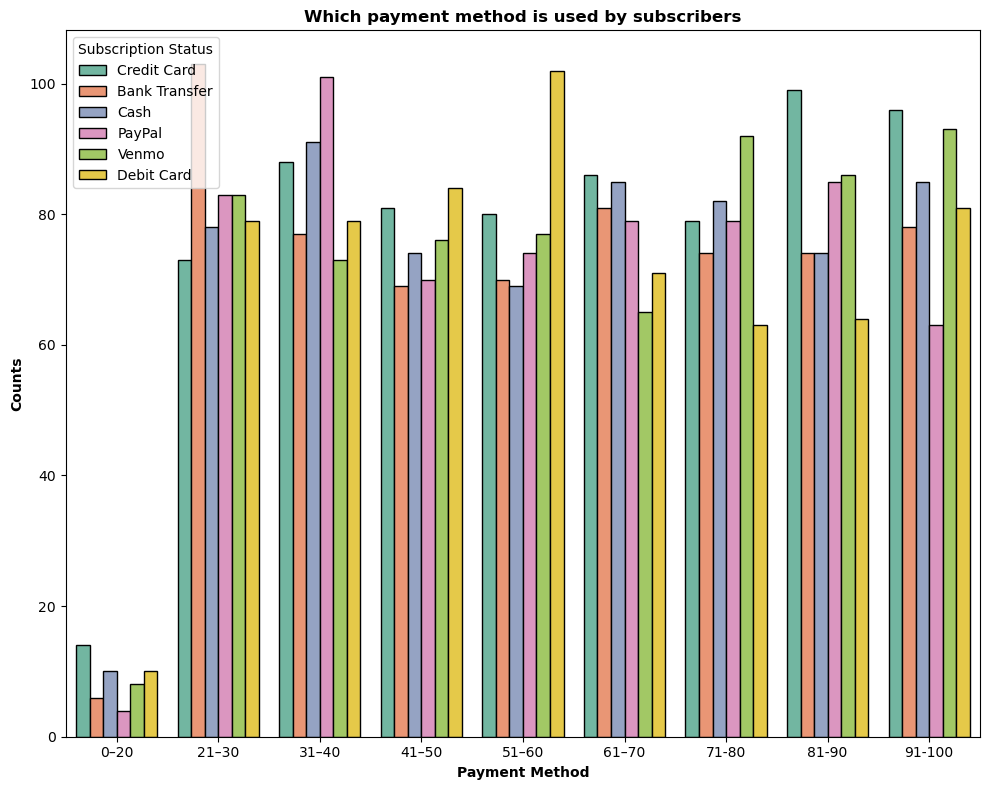

In [82]:
pd.crosstab(df['Purchase Amount (USD)_Group'], df['Payment Method'])
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'Purchase Amount (USD)_Group',hue = 'Payment Method' ,palette='Set2' ,edgecolor='black')
plt.xlabel('Payment Method',weight='bold',fontsize=10)
plt.ylabel("Counts",weight='bold',fontsize=10)
plt.legend(title="Subscription Status")
plt.title('Which payment method is used by subscribers', weight='bold')
plt.tight_layout()
plt.show()

#### The bar chart illustrates the distribution of payment methods across different purchase amount groups, revealing that Credit Card and PayPal are frequently used for higher-value purchases, suggesting user trust and convenience with these methods for larger transactions.

### I worked on a customer-level retail transaction dataset that included attributes such as Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Season, Review Rating, and various payment and subscription-related fields. To support deeper analysis, I engineered new features like Age_Group and Purchase Amount (USD)_Group for better segmentation.

### I performed extensive exploratory data analysis (EDA) using visual tools such as bar plots, pie charts, count plots, and heatmaps. Through these visualizations, I uncovered purchasing patterns across seasons, age groups, and genders, and observed that younger age groups contributed significantly to the overall revenue, while seasonal variations impacted the popularity of product categories.

### I encoded categorical variables and generated a correlation heatmap to examine relationships among selected features. This revealed positive correlations such as between subscription status and purchase behavior. Additionally, I analyzed payment method preferences across both subscription users and purchase amount groups, finding that methods like Credit Card and PayPal were preferred for higher-value transactions.

### Finally, I created grouped visualizations by category, season, and gender, which helped me identify high-revenue product categories and gender-based spending patterns. These insights can be leveraged for strategic marketing, inventory management, and improving customer engagement.

##  Key insights include: younger age groups contributed the most to revenue, Credit Card and PayPal were the preferred payment methods for high-value purchases, and seasonality strongly influenced category-wise sales. These findings are crucial for optimizing marketing strategies, inventory planning, and customer retention.